In [1]:
import numpy as np
import pandas as pd

In [147]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import ceil

class ResidualAnalysis:
    def __init__(self, data):
        self.data = data
        self.data.dropna(inplace=True)
        
    def fit_first_step_regression(self, y_col, x_cols, x_cat_cols=[], as_latex=True, cmap='Reds'):
        """
        Fit the first stage regression; print the regression summary; add residuals, reg, predict as a class property。
        y_col: (string) column name for y
        x_cols: (list of strings) column names for numerical type x
        x_cat_cols: (list of strings) column names for categorical type x
        """
        if len(x_cat_cols) == 0:
            cat_formula = ''
        else:
            cat_formula = ' + C(' + ') + C('.join(x_cat_cols) + ')'
        
        colors = dict(zip(df_map.index, cmap(labelcol_normalized)))
        colormap = []
        formula = y_col + ' ~ ' + ' + '.join(x_cols) +  cat_formula
        ols_first = ols(data = self.data, formula =formula).fit()
        print(ols_first.summary())
        if as_latex:
            print(ols_first.summary().as_latex())
        self.residuals = ols_first.resid
        self.reg = ols_first
        self.predict = ols_first.predict()
        
    def residual_plots_y(self):
        plt.figure(figsize=(10,6))
        plt.scatter(self.predict, self.residuals, c=self.residuals**2)
        plt.axhline(y=0, color='r', ls='--')
        plt.xlabel('Predicted Value')
        plt.ylabel('Residual')
        plt.show()
    
    def residual_plots_x(self, plot_x_cols):
        n = len(plot_x_cols)
        plt.figure(figsize=(15, 6*ceil(n/2)))
        for i in range(n):
            plt.subplot(ceil(n/2), 2, i+1)
            plt.scatter(self.data[plot_x_cols[i]], self.residuals, c=self.residuals**2)
            plt.axhline(y=0, color='r', ls='--')
            plt.xlabel(plot_x_cols[i])
            plt.ylabel('Residual')
        plt.show()

In [62]:
data = pd.read_csv('airbnb.csv')
ny = data[data['city']=='NYC']
ny['price'] = np.exp(ny['log_price'])

C:\Users\cuixu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [148]:
y_col = 'price'
x_cols = ['bedrooms', 'bathrooms', 'beds', 'accommodates']
x_cat_cols = ['neighbourhood', 'property_type']

ra = ResidualAnalysis(ny)
ra.fit_first_step_regression(y_col, x_cols, x_cat_cols, as_latex=False)

C:\Users\cuixu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     107.7
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        00:52:29   Log-Likelihood:            -1.0341e+05
No. Observations:               17856   AIC:                         2.073e+05
Df Residuals:                   17636   BIC:                         2.090e+05
Df Model:                         219                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

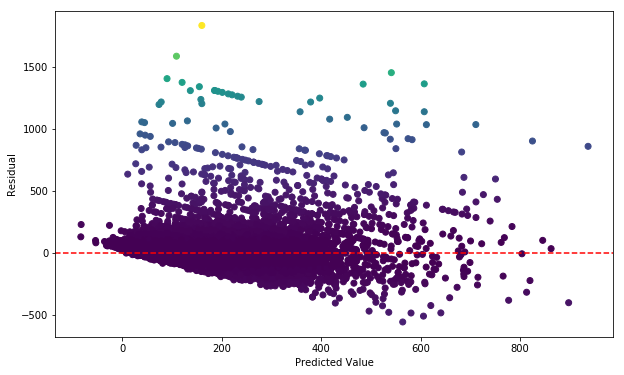

In [118]:
ra.residual_plots_y()

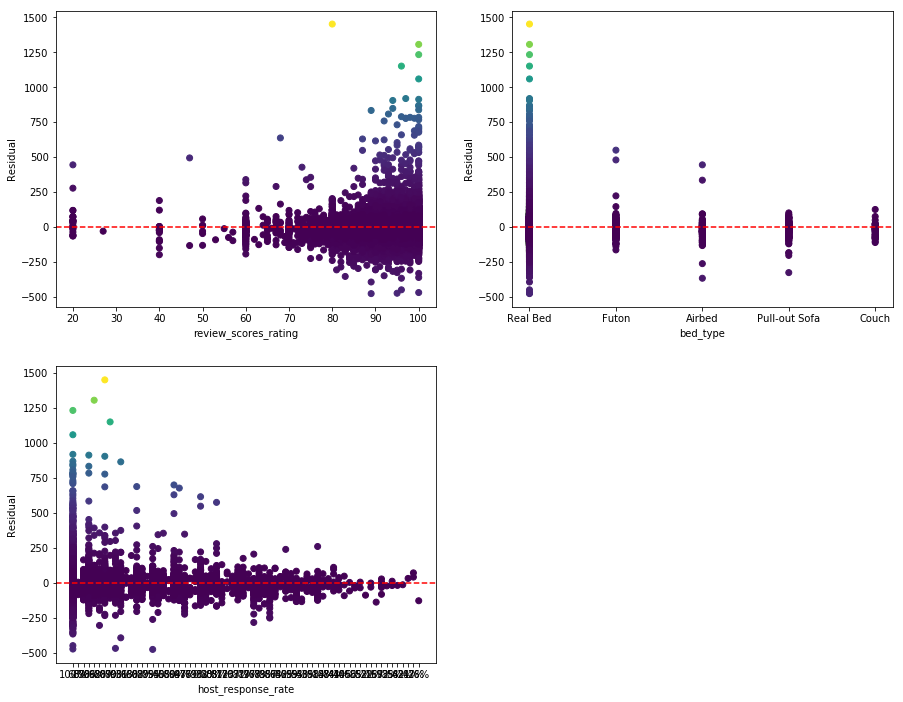

In [149]:
plot_x_cols = ['review_scores_rating', 'bed_type', 'host_response_rate']
ra.residual_plots_x(plot_x_cols)

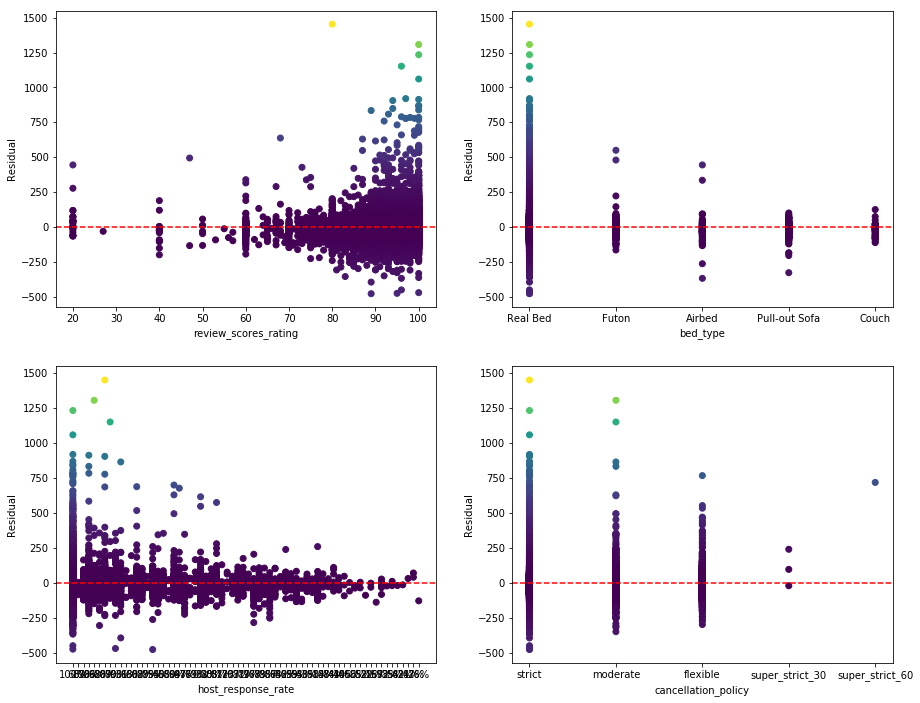

In [150]:
plot_x_cols = ['review_scores_rating', 'bed_type', 'host_response_rate', 'cancellation_policy']
ra.residual_plots_x(plot_x_cols)